In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
data = pd.read_csv("learningSet.csv", low_memory=False)

In [33]:
data.dtypes

ODATEDW       int64
OSOURCE      object
TCODE         int64
STATE        object
ZIP          object
             ...   
MDMAUD_R     object
MDMAUD_F     object
MDMAUD_A     object
CLUSTER2    float64
GEOCODE2     object
Length: 481, dtype: object

### Null Values numerical columns

In [34]:
numerical = data.select_dtypes(include=np.number)
categorical = data.select_dtypes(exclude=np.number)

In [35]:
for col in data.columns:
    print( col , data[col].isnull().sum())

ODATEDW 0
OSOURCE 0
TCODE 0
STATE 0
ZIP 0
MAILCODE 0
PVASTATE 0
DOB 0
NOEXCH 0
RECINHSE 0
RECP3 0
RECPGVG 0
RECSWEEP 0
MDMAUD 0
DOMAIN 0
CLUSTER 0
AGE 23665
AGEFLAG 0
HOMEOWNR 0
CHILD03 0
CHILD07 0
CHILD12 0
CHILD18 0
NUMCHLD 83026
INCOME 21286
GENDER 0
WEALTH1 44732
HIT 0
MBCRAFT 52854
MBGARDEN 52854
MBBOOKS 52854
MBCOLECT 52914
MAGFAML 52854
MAGFEM 52854
MAGMALE 52854
PUBGARDN 52854
PUBCULIN 52854
PUBHLTH 52854
PUBDOITY 52854
PUBNEWFN 52854
PUBPHOTO 52854
PUBOPP 52854
DATASRCE 0
MALEMILI 0
MALEVET 0
VIETVETS 0
WWIIVETS 0
LOCALGOV 0
STATEGOV 0
FEDGOV 0
SOLP3 0
SOLIH 0
MAJOR 0
WEALTH2 43823
GEOCODE 0
COLLECT1 0
VETERANS 0
BIBLE 0
CATLG 0
HOMEE 0
PETS 0
CDPLAY 0
STEREO 0
PCOWNERS 0
PHOTO 0
CRAFTS 0
FISHER 0
GARDENIN 0
BOATS 0
WALKER 0
KIDSTUFF 0
CARDS 0
PLATES 0
LIFESRC 0
PEPSTRFL 0
POP901 0
POP902 0
POP903 0
POP90C1 0
POP90C2 0
POP90C3 0
POP90C4 0
POP90C5 0
ETH1 0
ETH2 0
ETH3 0
ETH4 0
ETH5 0
ETH6 0
ETH7 0
ETH8 0
ETH9 0
ETH10 0
ETH11 0
ETH12 0
ETH13 0
ETH14 0
ETH15 0
ETH16 0
AGE901 0
AG

In [46]:
data.shape[0]

95412

In [49]:
for col in numerical:
    Percentage_null = (data[col].isna().sum()/data.shape[0])*100
    if Percentage_null > 80:
        print(col, Percentage_null)

NUMCHLD 87.01840439357733
RDATE_3 99.7463631409047
RDATE_4 99.70548777931498
RDATE_5 99.99056722424852
RDATE_6 99.1866851129837
RDATE_7 90.67727329895611
RDATE_9 82.46132561941894
RDATE_10 89.03597031819896
RDATE_11 84.55120949146858
RDATE_13 87.1609441160441
RDATE_15 92.38879805475202
RDATE_17 90.14694168448413
RDATE_19 83.35953548819855
RDATE_20 91.73269609692701
RDATE_21 90.02955603068796
RDATE_23 91.76309059657066
RDATE_24 81.40904708003185
RAMNT_3 99.7463631409047
RAMNT_4 99.70548777931498
RAMNT_5 99.99056722424852
RAMNT_6 99.1866851129837
RAMNT_7 90.67727329895611
RAMNT_9 82.46132561941894
RAMNT_10 89.03597031819896
RAMNT_11 84.55120949146858
RAMNT_13 87.1609441160441
RAMNT_15 92.38879805475202
RAMNT_17 90.14694168448413
RAMNT_19 83.35953548819855
RAMNT_20 91.73269609692701
RAMNT_21 90.02955603068796
RAMNT_23 91.76309059657066
RAMNT_24 81.40904708003185


### Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

In [36]:
cleaning_columns_numeric = [ "WEALTH1", "ADI", "DMA","MSA"]

In [37]:
data[["GEOCODE2", "WEALTH1", "ADI", "DMA","MSA"]].dtypes


GEOCODE2     object
WEALTH1     float64
ADI         float64
DMA         float64
MSA         float64
dtype: object

In [38]:
data

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,ASE,1,AK,99504,,,0,0,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,DCD,1,TX,77379,,,5001,0,,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,MBC,1,MI,48910,,,3801,0,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,PRV,0,CA,91320,,,4005,0,X,...,18.0,1,L,4,F,X,X,X,11.0,A


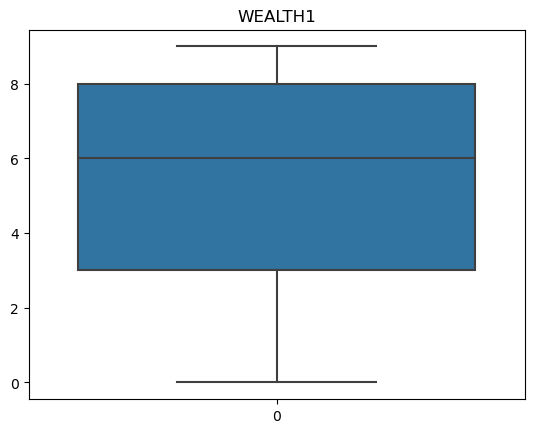

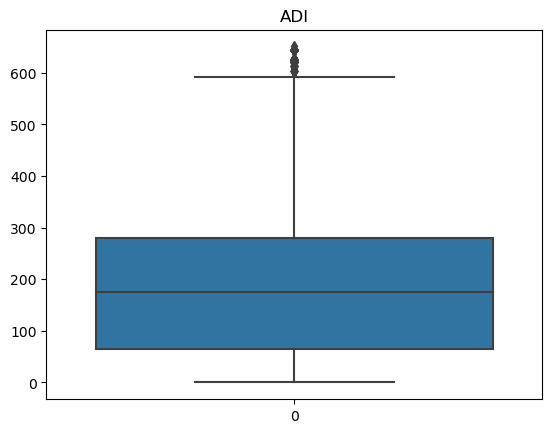

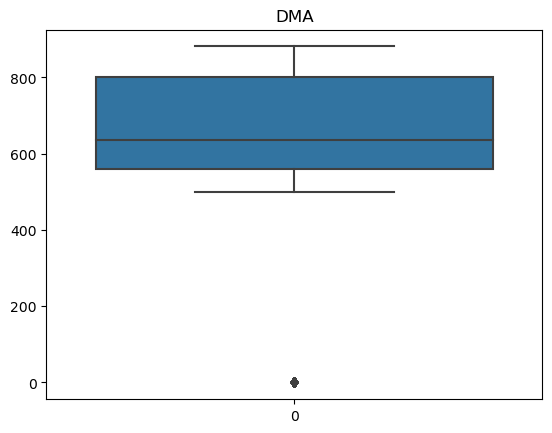

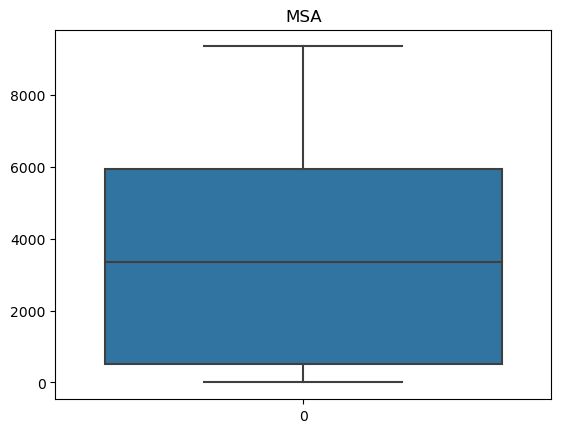

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming cleaning_columns is a list of column names

for col in cleaning_columns_numeric:
    sns.boxplot(data[col])
    plt.title(col)
    plt.show()


In [40]:
data.WEALTH1.value_counts

<bound method IndexOpsMixin.value_counts of 0        NaN
1        9.0
2        1.0
3        4.0
4        2.0
        ... 
95407    NaN
95408    9.0
95409    NaN
95410    NaN
95411    8.0
Name: WEALTH1, Length: 95412, dtype: float64>

In [41]:
data.GEOCODE2.value_counts

<bound method IndexOpsMixin.value_counts of 0        C
1        A
2        C
3        C
4        A
        ..
95407    C
95408    A
95409    B
95410    A
95411    C
Name: GEOCODE2, Length: 95412, dtype: object>

In [29]:
data.ADI.value_counts

<bound method IndexOpsMixin.value_counts of 0        177.0
1         13.0
2        281.0
3         67.0
4        127.0
         ...  
95407      0.0
95408    201.0
95409     61.0
95410     13.0
95411    355.0
Name: ADI, Length: 95412, dtype: float64>

In [42]:
data2 = data.copy()

### Removing Outliers

In [ ]:
## this doesn´t work
for col in cleaning_columns_numeric:
    iqr = np.percentile(data2[col], 75) - np.percentile(data2[col], 25)
    upper_limit = np.percentile(data2[col], 75) + 1.5 * iqr
    lower_limit = np.percentile(data2[col], 25) - 1.5 * iqr
    data2 = data2[(data2[col] > lower_limit) & (data2[col] < upper_limit)]

### GEOCODE

In [50]:
data['GEOCODE2'].value_counts(dropna=False)

A      34484
B      28505
D      16580
C      15524
         187
NaN      132
Name: GEOCODE2, dtype: int64

### Replace with Mode

In [52]:
data['GEOCODE2'] = data['GEOCODE2'].replace(' ', np.nan)
mode_geocode2 = data['GEOCODE2'].mode()[0]
data['GEOCODE2'] = data['GEOCODE2'].fillna(mode_geocode2)

In [53]:
data['GEOCODE2'].value_counts(dropna=False)

A    34803
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64

### <div style='background-color: palegreen; padding: 10px;'>WEALTH</div>

In [56]:
cleaning_columns_numeric

['WEALTH1', 'ADI', 'DMA', 'MSA']

In [57]:
data["WEALTH1"].value_counts(dropna = False)


NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

/var/folders/9g/0kknk5wn63q6t61d2hr_55440000gn/T/ipykernel_70585/3210282603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data["WEALTH1"].isna() == False]['WEALTH1'])


<Axes: xlabel='WEALTH1', ylabel='Density'>

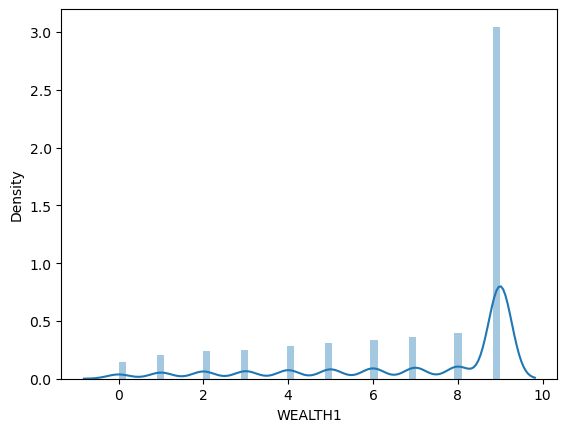

In [72]:
sns.distplot(data[data["WEALTH1"].isna() == False]['WEALTH1'])

In [66]:
data["WEALTH1"] = data["WEALTH1"].astype("object")
data["WEALTH1"] = data["WEALTH1"].fillna("9.0")

### ADI

In [59]:
len(data)

95412

In [58]:
data["ADI"].value_counts(dropna = False)
data["ADI"].isna().sum()/data["ADI"]*100/len(data)

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 205, dtype: int64

In [61]:
(data["ADI"].isna().sum()/len(data))*100

0.1383473776883411

/var/folders/9g/0kknk5wn63q6t61d2hr_55440000gn/T/ipykernel_70585/2151455018.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data["ADI"].isna() == False]['ADI'])


<Axes: xlabel='ADI', ylabel='Density'>

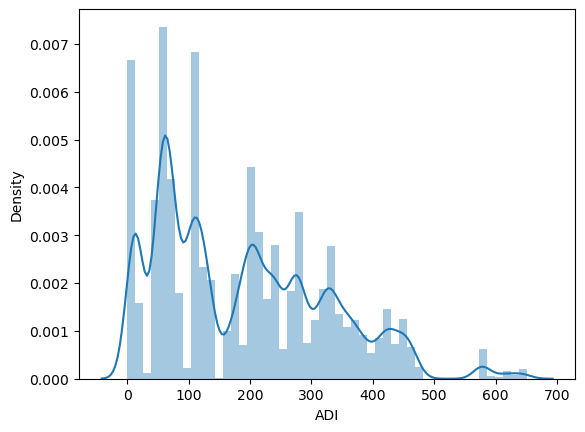

In [73]:
sns.distplot(data[data["ADI"].isna() == False]['ADI'])

### DMA

In [63]:
print("Unique Values DMA", data["DMA"].unique())
data["DMA"].value_counts(dropna = False)


Unique Values DMA [682. 803. 518. 862. 528. 691. 509. 643. 624. 659. 671. 527. 613. 716.
 770. 505. 717. 534. 560. 547. 571. 602. 800. 638. 618. 609. 820. 821.
 635. 675. 563. 819. 617. 637. 606. 709. 632. 807. 698. 623. 507. 627.
 524. 517. 539. 649. 868. 546. 529. 567. 825. 512. 669. 764. 575. 548.
 662. 811. 801. 652. 771. 603. 556. 622. 561. 724. 804. 633. 839. 686.
 650. 743. 619. 678. 753. 610. 745. 604. 749. 670. 765. 711. 553. 762.
 520. 503. 551. 515. 647. 544.   0. 676. 752. 545. 754. 810. 790. 656.
 755. 641. 616. 628. 588. 581. 540. 658. 583. 866. 642. 746. 634. 648.
 705. 725. 744. 513. 612. 813. 531. 751. 500. 630. 611. 789. 582. 693.
 692. 828. 626. 710. 542. 855. 687. 679. 640. 722. 620. 881. 564. 522.
 756. 570. 718.  nan 530. 557. 625. 541. 657. 631. 550. 525. 605. 773.
 519. 535. 600. 734. 759. 757. 511. 798. 802. 644. 651. 702. 737. 767.
 673. 736. 636. 592. 758. 504. 639. 501. 506. 523. 760. 766. 646. 740.
 574. 598. 533. 661. 508. 537. 514. 510. 577. 549. 532. 521

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 207, dtype: int64

In [64]:
(data["DMA"].isna().sum()/len(data))*100

0.1383473776883411

In [ ]:
sns.distplot(data[data["ADI"].isna() == False]['ADI'])

### MSA

In [65]:
print("Unique Values MSA", data["MSA"].unique())
data["MSA"].value_counts(dropna = False)

Unique Values MSA [   0. 4480. 9340. 5000. 2030. 3960. 5360. 3480.  760. 2160. 5960. 5120.
  440. 6580. 1600.  680. 3360. 7040. 2920. 3120. 6440.  640. 6120. 3000.
 7600. 2680. 5080. 1360. 2180. 4420. 1960. 6640. 7360. 5945. 1920. 1145.
 7520. 2800. 1520. 7510. 1620. 4520. 7320.  720. 4720. 1560. 8960.   40.
 6720.  520. 9360. 3710. 8280. 6760. 3160. 5560. 3600. 6780. 5800. 4120.
 5160. 5880.  380. 3440. 2710. 2020. 9040. 6200. 6880. 6920. 2760. 7080.
 4080. 2580. 4100. 5790. 4200.  600. 4680. 4040. 1640. 5775. 8720. 3980.
 2240. 1720. 5910. 9260.  200. 7400. 1020. 3290. 2720. 7240. 3800. 8120.
  870. 2320. 3760. 1040. 2840. 3880.  920. 6080.  460.  320. 1400. 3320.
 2640. 8200. 4890. 3660. 2670. 1000. 2520. 2440. 8520. 3720. 2080. 7500.
 3920. 1125. 4400.  840. 7485. 8750. 8735. 1150. 5280. 3285. 7460. 2620.
 7160. 4920. 8600.  880. 2985. 5920. 2655. 3560.   nan 3500. 7720. 7480.
  860. 2330. 7680. 5200. 3400. 3605. 2750. 8240. 3080. 5170. 3150.  480.
 6660. 3840. 2120. 3810. 2960. 78

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 299, dtype: int64